In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scanpy as sc
import seaborn as sns
import pandas as pd
import glob
import subprocess
import scipy.spatial as spatial
import random
import scipy
import statsmodels


def marker_plot(
    adata,
    heading,
    markers,
    crop,
    tfnt=15,
    t=0,
    nrow=10,
    ncol=5,
    wd=6,
    spot=50,
    alpha=0.6,
    rembar=True,
    vmx="p99.2",
):
    fig, ax = plt.subplots(
        nrow, ncol, figsize=(ncol * wd, nrow * wd), gridspec_kw={"wspace": 0.01}
    )
    axr = ax.ravel()
    # sc.pl.spatial(adata, color='total_counts',vmax='p99.2',spot_size=40,frameon=False,
    #                  crop_coord=crop,cmap='plasma',alpha=.6,ax=axr[0], show=False)
    for i, gene in enumerate(markers):
        # i=i+1
        try:
            # ad=adata[ (adata[:,gene].X>0)]
            # if ad.shape[0]>10000:
            #    t=0;print(ad.shape[0],gene,adata[ (adata[:,gene].X>t)].shape[0])
            # else:
            #    t=0;print(ad.shape[0],gene)
            if vmx is not None:
                sc.pl.spatial(
                    adata[(adata[:, gene].X > t)],
                    color=gene,
                    vmax=vmx,
                    spot_size=spot,
                    ax=axr[i],
                    show=False,
                    frameon=False,  # frameon=True,
                    crop_coord=crop,
                    # crop_coord=[300,5000,5100,400],
                    # crop_coord=[500,4600,4800,400],
                    cmap="plasma",
                    alpha=alpha,
                    alpha_img=0.8,
                )
            else:
                sc.pl.spatial(
                    adata[(adata[:, gene].X > t)],
                    color=gene,
                    spot_size=spot,
                    ax=axr[i],
                    show=False,
                    frameon=False,  # frameon=True,
                    crop_coord=crop,
                    # crop_coord=[300,5000,5100,400],
                    # crop_coord=[500,4600,4800,400],
                    cmap="plasma",
                    alpha=alpha,
                    alpha_img=0.8,
                )
            # scalebar = ScaleBar(0.65,"um", length_fraction=1 / 3 / 2,frameon=False,label_loc="bottom",label=None,location="lower right")
            # axr[i].add_artist(scalebar)
            if heading is None:
                axr[i].set_title(
                    f"{gene}", fontsize=tfnt
                )  # , fontweight='bold')#,f'{gene}\n{puck}' fontwieght="medium")
            else:
                axr[i].set_title(f"{gene}\n{heading}", fontsize=tfnt)
            cbar = axr[i].collections[0].colorbar
            if rembar:
                cbar.remove()
        except:
            axr[i].remove()
            # i=i-1
    for j in np.arange(i + 1, len(axr)):
        axr[j].remove()


def mtx_adata(slideseq_folder, save=True):
    
    folder_name = os.path.basename(slideseq_folder)
    date = folder_name.split("_")[0]
    puck = folder_name.split(date + "_")[1]

    if os.path.isfile(f"{slideseq_folder}/adata_{puck}_raw.h5ad"):
        print(f"adata for {puck} exists")
    else:
        
        print(f"load in counts matrix in mtx format for {puck}")
        
        adata = sc.read_mtx(
            f"{slideseq_folder}/{puck}.matched.digital_expression_matrix.mtx.gz"
        )
        adata = adata.T
        
        print("load in gene names/ids table")
        
        adata.var = pd.read_table(
            f"{slideseq_folder}/{puck}.matched.digital_expression_features.tsv.gz",
            names=["ensembl", "gene"],
            index_col=1,
        )
        
        print("load in bead barcodes and location table")
        
        barcodes = pd.read_table(
            f"{slideseq_folder}/{puck}.matched.digital_expression_barcodes.tsv.gz",
            names=["barcode"],
            index_col=0,
        ) 
        
        barcode_xy = pd.read_table(
            f"{slideseq_folder}/{puck}_barcode_xy.txt.gz", names=["x", "y"], index_col=0
        )
        
        adata.obs = barcodes.merge(barcode_xy, left_index=True, right_index=True)
        adata.obsm["spatial"] = adata.obs.values
        sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=True, inplace=True)
        if save:
            print(f"saving adata file for {puck}")
            adata.write_h5ad(f"{slideseq_folder}/adata_{puck}_raw.h5ad")

In [53]:
root_dir = '/home/jupyter/follicular_lymphoma'

In [54]:
library_folders = os.listdir(root_dir)

# convert slide-seq pipeline outputs to proper AnnData objects

In [57]:
for lib in library_folders:
    slideseq_folder = f'{root_dir}/{lib}'
    mtx_adata(slideseq_folder)

adata for Puck_230508_24 exists
adata for Puck_230425_21 exists
adata for Puck_230425_22 exists
load in counts matrix in mtx format for Puck_230504_32
load in gene names/ids table
load in bead barcodes and location table
saving adata file for Puck_230504_32
load in counts matrix in mtx format for Puck_230517_29
load in gene names/ids table
load in bead barcodes and location table
saving adata file for Puck_230517_29
load in counts matrix in mtx format for Puck_230517_32
load in gene names/ids table
load in bead barcodes and location table
saving adata file for Puck_230517_32
load in counts matrix in mtx format for Puck_230504_23
load in gene names/ids table
load in bead barcodes and location table
saving adata file for Puck_230504_23
load in counts matrix in mtx format for Puck_231024_28
load in gene names/ids table
load in bead barcodes and location table
saving adata file for Puck_231024_28
load in counts matrix in mtx format for Puck_231024_25
load in gene names/ids table
load in be

# make single gene plots from pucks

In [78]:
crop = [0,5000,0,5000]

In [113]:
folder_name = library_folders[19]
slideseq_folder = f'{root_dir}/{folder_name}'
date = folder_name.split("_")[0]
puck = folder_name.split(date + "_")[1]

adata = sc.read(f"{slideseq_folder}/adata_{puck}_raw.h5ad")

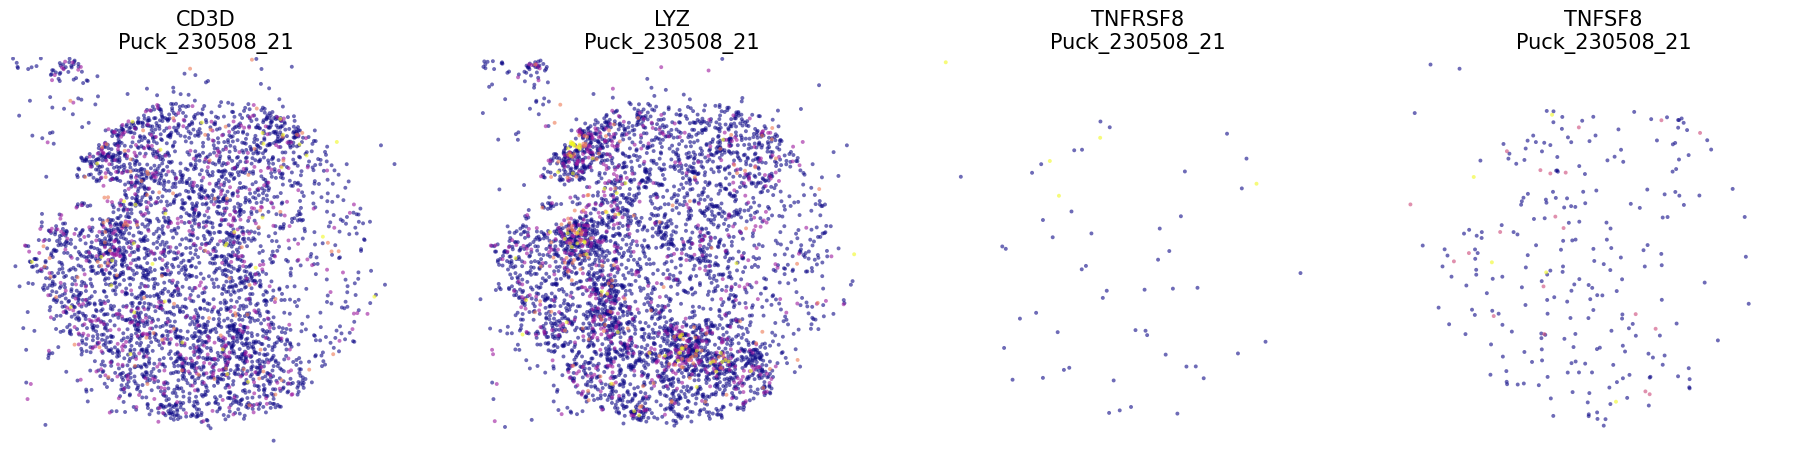

In [114]:
folder_name = os.path.basename(slideseq_folder)
date = folder_name.split("_")[0]
puck = folder_name.split(date + "_")[1]

marker_plot(adata,heading=puck,crop=crop,markers=['CD3D','LYZ','TNFRSF8','TNFSF8'])

# make a proper csv file with puck, patient and adata path

In [3]:
pucks = pd.read_csv('../FL_pucks.csv',names=['puck','patient'])

pucks = pucks.drop_duplicates()

root_dir = "/home/jupyter/follicular_lymphoma"

all_puck_path = []
for i in range(len(pucks)):
    puck = pucks.iloc[i].puck
    puck_adata_path = f"{root_dir}/2025-01-23_{puck}/adata_{puck}_raw.h5ad"
    all_puck_path.append(puck_adata_path)

pucks['adata_path'] = all_puck_path

pucks.to_csv('FL_pucks_with_path.csv',index=None)

# aggregate results of spatial data and merge with original LIANA csv

In [20]:
res_dir = '../fl_results/'

In [21]:
files = os.listdir(res_dir)

dfs=[]
for f in files:
    if 'result_' in f:
        #if 'IL21R' in f:
        dfs.append(pd.read_csv(res_dir+'/'+f,index_col=0))

res_all = pd.concat(dfs)

uniqs=res_all.LR.unique()


from scipy import stats

LRs=[]
for d in [15,30,100,300]:
    res=res_all[res_all.distance==d].copy()
    res['hit/mean']=res['hits']/res['mean']
    for lr in uniqs:
        sub=res[res.LR==lr]
        a=stats.combine_pvalues(sub.pval,method='fisher')[1]
        LRs.append([lr,d,a,sub['hit/mean'].mean()])

In [22]:
LRs=pd.DataFrame(LRs)

In [23]:
LRs.columns=['LR','distance','pval','mean effect']

In [24]:
LR=LRs.sort_values(by='pval',ascending=True)

In [25]:
from statsmodels.stats import multitest

LR['fdr'] = multitest.fdrcorrection(LR.pval, alpha=0.05,is_sorted=False)[1]

LR['-logfdr']=-np.log10(LR['fdr'])

In [26]:
LR=LR[['LR', 'distance', 'mean effect', '-logfdr']]
LR.columns=['LR', 'dist', 'effect', '-logfdr']
#LR[LR.LR.str.contains('CD274--CD80')]
#LR=LR.sort_values(by='score',ascending=True)#.head(20)
#LR[LR.LR=='CD274--CD80'].pivot(index='LR',columns='dist')#['pval']
LR=LR.pivot(index='LR', columns='dist')#['pval']

LR2=LR.T.reset_index()
LR2.index=LR2['dist'].astype('str')+'p_'+LR2['level_0']
LR2=LR2[LR2.columns[2:]]
LR2=LR2.T
LR_all=LR2.reset_index()

In [27]:
Liana = pd.read_csv('../liana_FL.csv',index_col=0)
Liana['complex_pair'] = Liana['ligand.complex']+'--'+Liana['receptor.complex']

final_df = pd.merge(Liana,LR_all,how='left',left_on='complex_pair',right_on='LR')

In [29]:
final_df.to_csv('../liana_FL_spatial_merged.csv.gz',compression='infer',index=None)